# **Business Case : Netflix - Data Exploration and Visualisation**



# Business Problem

Analyse the data and generate insights that could help Netflix in deciding **which type of shows/movies to produce** and **how they can grow the business in different countries**

## Data Pre-Processing

Loading the data & Importing necessary libraries

Importing necesary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Downloading and loading the dataset

In [ ]:
# Download the Dataset from README

Displaying the Rows of the Dataset

In [ ]:
df = pd.read_csv('netflix.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### Analysis of Basic Metrics

Number of Movies & TV Shows in the dataset


In [ ]:
# Number of Movies and TV Shows in the dataset
df.shape[0]

8807

Display the columns in the dataset their counts and their respective datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Columns in the Dataset


In [ ]:
df.keys()

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Checking for Null-Values

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Checking for Unique Values for ech column

In [ ]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

Check for duplicate values

In [ ]:
df.duplicated().sum()
# No duplicate values are present

0

### Handling Null-Values

In [ ]:
# Replacing missing values in the 'director' column with 'No Data'
df['director'].replace(np.nan, 'No Data', inplace=True)

# Replacing missing values in the 'cast' column with 'No Data'
df['cast'].replace(np.nan, 'No Data', inplace=True)

In [ ]:
# Filling missing values in the 'country' column with the mode of 'country' value
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [ ]:
# Finding the mode rating for movies and TV shows
movie_rating = df.loc[df['type'] == 'Movie', 'rating'].mode()[0]
tv_rating = df.loc[df['type'] == 'TV Show', 'rating'].mode()[0]

# Filling missing rating values based on the type of content
df['rating'] = df.apply(lambda x: movie_rating if x['type'] == 'Movie' and pd.isna(x['rating'])
 else tv_rating if x['type'] == 'TV Show' and pd.isna(x['rating'])
 else x['rating'], axis=1)

In [ ]:
# Finding the mode duration for movies and TV shows
movie_duration_mode = df.loc[df['type'] == 'Movie', 'duration'].mode()[0]
tv_duration_mode = df.loc[df['type'] == 'TV Show', 'duration'].mode()[0]

# Filling missing duration values based on the type of content
df['duration'] = df.apply(lambda x: movie_duration_mode if x['type'] == 'Movie'
 and pd.isna(x['duration'])
else tv_duration_mode if x['type'] == 'TV Show'
 and pd.isna(x['duration'])
else x['duration'], axis=1)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Dropping the remaining missing values


In [ ]:
df.dropna(inplace=True)

We can see that after handling Null Values, there  are no null-values in any columns from the below cell:

In [ ]:
df.isnull().sum()
# As we can see, there are no missing values in our data

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Change 'date_added' to 'datetime' format


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Adding additional Columns such as 'year_added', 'month_added', 'month_name_added'


In [ ]:
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021


To make it easier to analyze ,the 'cast', 'country', 'listed_in', and 'director' columns are splitted into separate dataframes (Tables) for each one. This lets us look at the data more closely.

In [ ]:
# Splitting and expanding the 'cast' column
df_cast = df['cast'].str.split(',', expand=True).stack()
df_cast = df_cast.reset_index(level=1, drop=True).to_frame('cast')
df_cast['show_id'] = df['show_id']
# Splitting and expanding the 'country' column
df_country = df['country'].str.split(',', expand=True).stack()
df_country = df_country.reset_index(level=1, drop=True).to_frame('country')
df_country['show_id'] = df['show_id']
# Splitting and expanding the 'listed_in' column
df_listed_in = df['listed_in'].str.split(',', expand=True).stack()
df_listed_in = df_listed_in.reset_index(level=1, drop=True).to_frame('listed_in')
df_listed_in['show_id'] = df['show_id']
# Splitting and expanding the 'director' column
df_director = df['director'].str.split(',', expand=True).stack()
df_director = df_director.reset_index(level=1, drop=True).to_frame('director')
df_director['show_id'] = df['show_id']

The next step is to perform Exploratory Data Analysis on the cleaned/processed dataset

## Exploratory Data Analysis

### Distribution of Movies and TV Shows


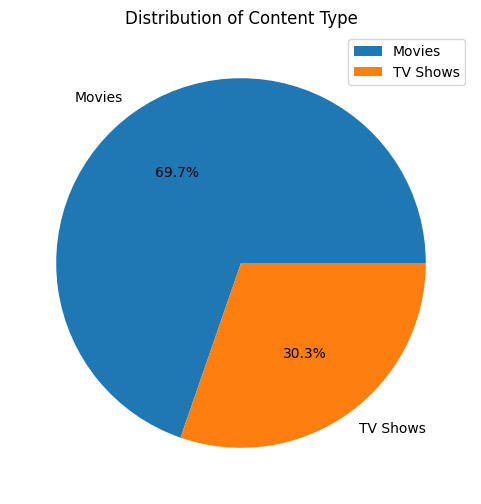

In [ ]:
# Distribution of Movies and TV Shows
plt.figure(figsize=(6, 6))
labels = ['Movies', 'TV Shows']
sizes = [df.loc[df['type'] == 'Movie'].shape[0], df.loc[df['type'] == 'TV Show'].shape[0]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Content Type')
plt.legend()
plt.show()

Insights:

- It is evident from the pie chart that Netflix produces more Movies (69.7%) than TV Shows (30.3%)




### Number of Movies and TV Shows added over time

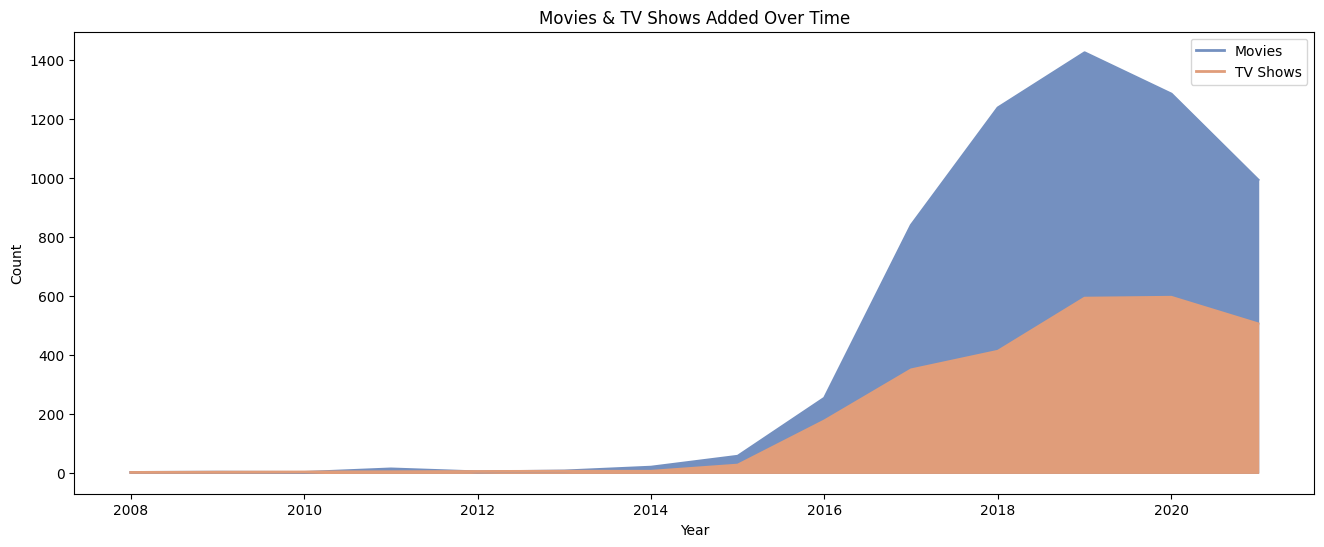

In [ ]:
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

movies_count = movies['year_added'].value_counts().sort_index()
tv_shows_count = tv_shows['year_added'].value_counts().sort_index()

plt.figure(figsize=(16, 6))
plt.plot(movies_count, color='#7490c0', label='Movies', linewidth=2)
plt.plot(tv_shows_count, color='#e09d7a', label='TV Shows', linewidth=2)
plt.fill_between(movies_count.index, movies_count.values, color='#7490c0')
plt.fill_between(tv_shows_count.index, tv_shows_count.values, color='#e09d7a')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Movies & TV Shows Added Over Time')
plt.legend()
plt.show()

Insights:

- We can observe that the content produced started increasing from the year 2015 at a greater scale with a spike in 2019, followed by a drop in the year 2020, when it sees a drop in the content produced. This could be due to the effect of the pandemic.

- We can also see here that more Movies are Produced compared to TV Shows.

### Top 10 Countries Where Netflix is Popular

Countries where Netflix is available

In [ ]:
# Netflix is Available in :
No_of_countries = df_country['country'].unique().shape[0]
print("Netflix is Available in",No_of_countries,"Countries")

Netflix is Available in 197 Countries


In [ ]:
# Countries where Netflix is available
df_country['country'].unique()

array(['United States', 'South Africa', 'India', ' Ghana',
       ' Burkina Faso', ' United Kingdom', ' Germany', ' Ethiopia',
       'United Kingdom', 'Germany', ' Czech Republic', 'Mexico', 'Turkey',
       'Australia', ' India', ' France', 'Finland', 'China', ' Canada',
       ' United States', ' Japan', 'Nigeria', 'Japan', 'Spain', 'France',
       'Belgium', 'South Korea', ' Singapore', ' Australia', ' Mexico',
       ' Italy', ' Romania', 'Argentina', ' Venezuela', ' Hong Kong',
       'Russia', 'Canada', 'Hong Kong', ' China', 'Italy', '',
       ' South Korea', 'Ireland', ' Nepal', 'New Zealand', ' Brazil',
       ' Greece', 'Jordan', 'Colombia', 'Switzerland', 'Israel', 'Brazil',
       ' Spain', 'Taiwan', ' Nigeria', 'Bulgaria', ' Algeria', 'Poland',
       ' Israel', 'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt',
       ' Denmark', ' Switzerland', 'Kuwait', ' Netherlands', ' Belgium',
       'Malaysia', ' New Zealand', 'Vietnam', ' Hungary', 'Sweden',
       'Lebanon', 'R

In [ ]:
df_country['country'] = df_country['country'].str.strip()
top_10_countries = df_country['country'].value_counts().head(10)

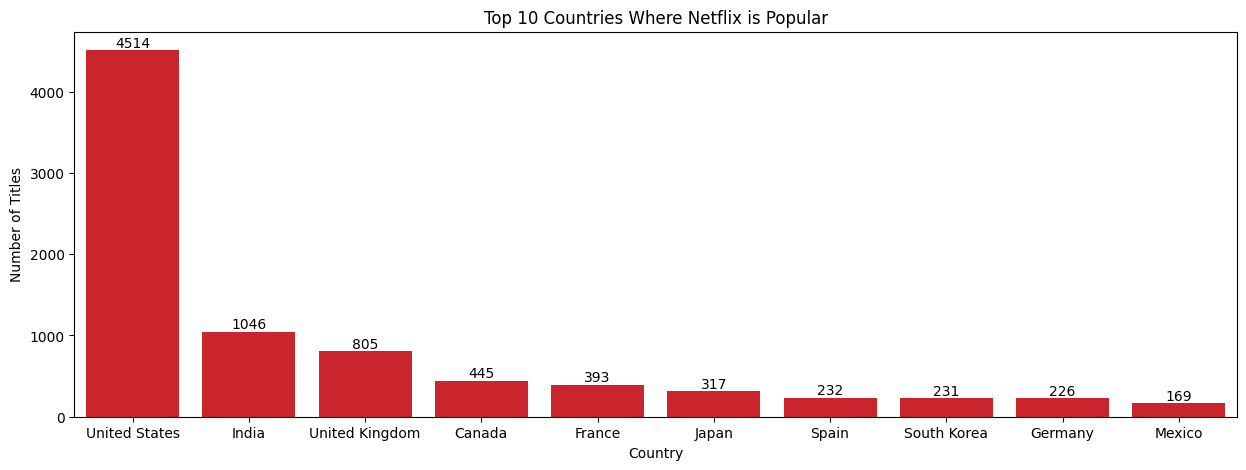

In [ ]:
plt.figure(figsize=(15, 5))
bar_plot = sns.barplot(x=top_10_countries.index, y=top_10_countries.values, color='#E50914')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.title('Top 10 Countries Where Netflix is Popular')
for index, value in enumerate(top_10_countries.values):
 bar_plot.text(index, value, str(value), ha='center', va='bottom')

-  **United States** has the highest number of Movie/TV Show titles followed by **India** and **United Kingdom**, **Canada** and **France** which complete the Top 5 Countries by Number of titles.

### Number of Movie titles by Duration

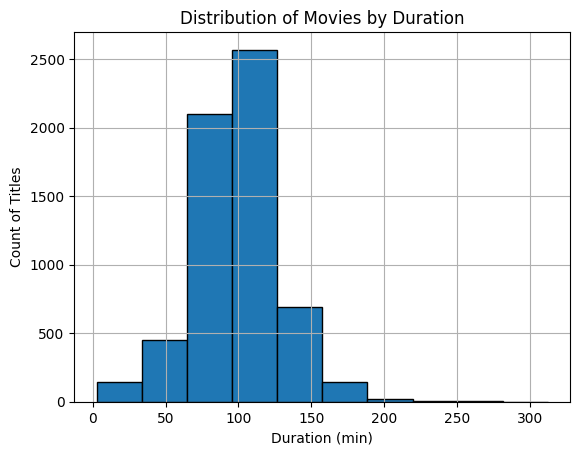

In [ ]:
# Number of MovieTitles by Duration
df['duration_numeric'] = df['duration'].str.split(' ', expand=True)[0].astype(int)
movies = df[df['type'] == 'Movie']
movies['duration_numeric'].hist(edgecolor='black')
plt.title('Distribution of Movies by Duration')
plt.xlabel('Duration (min)')
plt.ylabel('Count of Titles')
plt.show()

Insights:

- From the histogram it is evident that **most of the movies** have a duration ranging between (**60 min to 125 min**) and there are **a very few movies** with a duration **greater than 250 min**.

- The **lowest duration is 5 min** and **highest is around 280 min**.

### Duration Distribution for Movies vs TV Shows


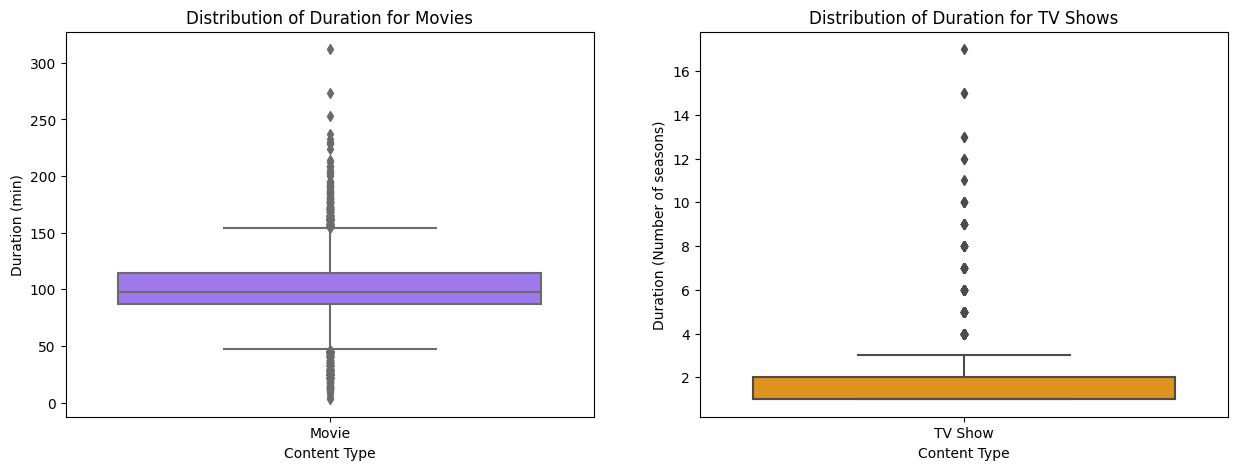

In [ ]:
tv_shows_data = df.loc[df['type']=='TV Show']
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=movies, x='type', y='duration_numeric', color = '#9966ff')
plt.xlabel('Content Type')
plt.ylabel('Duration (min)')
plt.title('Distribution of Duration for Movies')
plt.subplot(1,2,2)
sns.boxplot(data=tv_shows_data, x='type', y='duration_numeric', color='#ff9900')
plt.xlabel('Content Type')
plt.ylabel('Duration (Number of seasons)')
plt.title('Distribution of Duration for TV Shows')
plt.show()

Insights:

- From the **Distribution of Duration for Movies** we can see that the Median duration of Movie Titles is **100 min** with few outliers exceeding approximately 2.5 hours. This indicates that the majority of movies available on Netflix conform to a typical runtime.


- From the **Distribution of Duration for TV Shows**, we can observe that most of the tv shows have 1 - 4 seasons with very few outliers having longer durations.

### Count of Shows by Number of Seasons

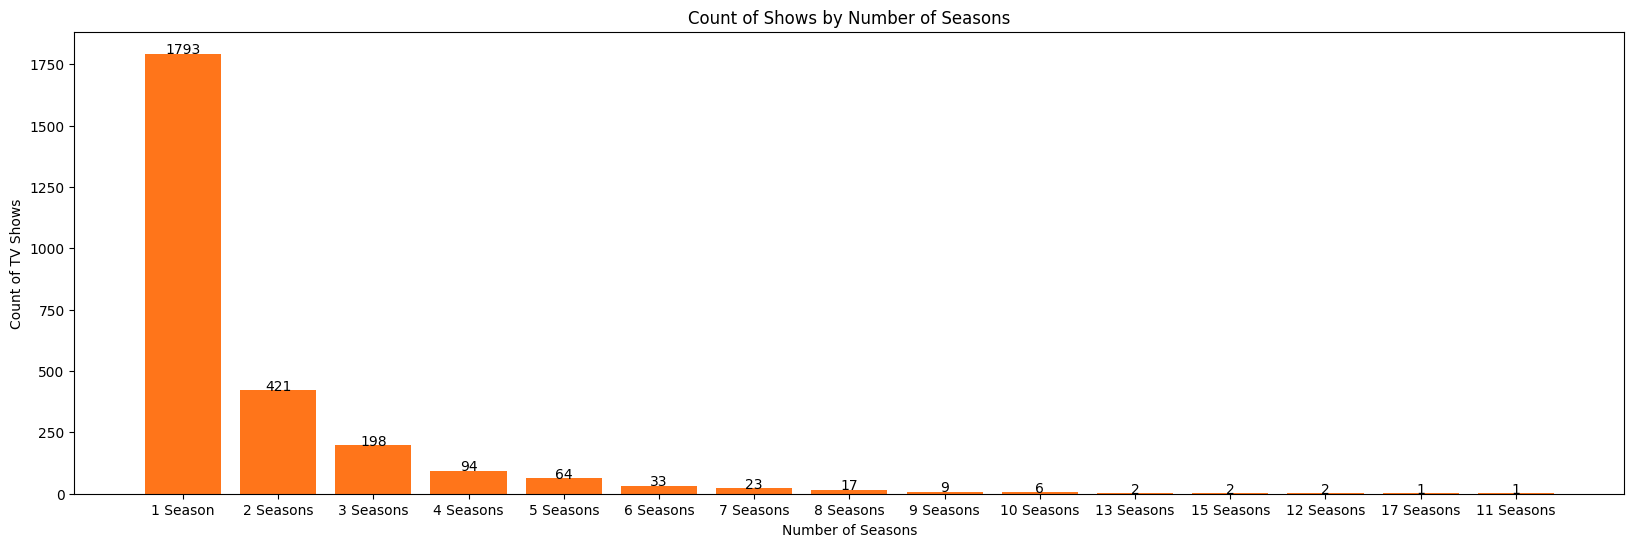

In [ ]:
season_counts = tv_shows['duration'].value_counts()
plt.figure(figsize=(20,6))
plt.bar(season_counts.index, season_counts.values, color = '#ff751a')
plt.xlabel('Number of Seasons')
plt.ylabel('Count of TV Shows')
plt.title('Count of Shows by Number of Seasons')
for i, v in enumerate(season_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center')
plt.show()

Insights:

- From the bar plot we can observe the trend that tv show content with a very high number of seasons are very few and the typical number of seasons is 1.

- This also reinforces the observation from the boxplot for tv shows above, which indicates that Netflix focuses on shorter series formats.

### Top 10 Directors by Number of Movie Titles

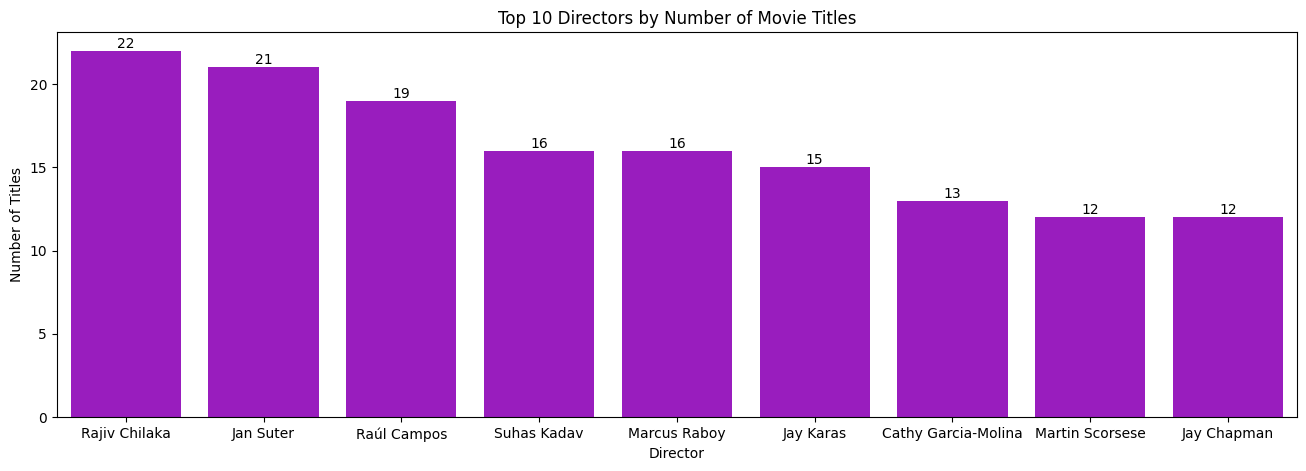

In [ ]:
# Top 10 Directors by Number of Movie Titles
df_director['director'] = df_director['director'].str.strip()
top_10_directors = df_director['director'].value_counts().head(10)[1:]
plt.figure(figsize=(16, 5))
bar_plot = sns.barplot(x=top_10_directors.index, y=top_10_directors.values, color='#a702d9')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.title('Top 10 Directors by Number of Movie Titles')
for i, count in enumerate(top_10_directors.values):
    bar_plot.text(i, count, count, ha='center', va='bottom')

Insights:

- The bar chart shows the top 10 directors who have the highest number of movies or TV shows. **Rajiv Chilaka** has the most number of titles in the Netflix collection.

### Top 10 Actors by Movie/TV Show Count

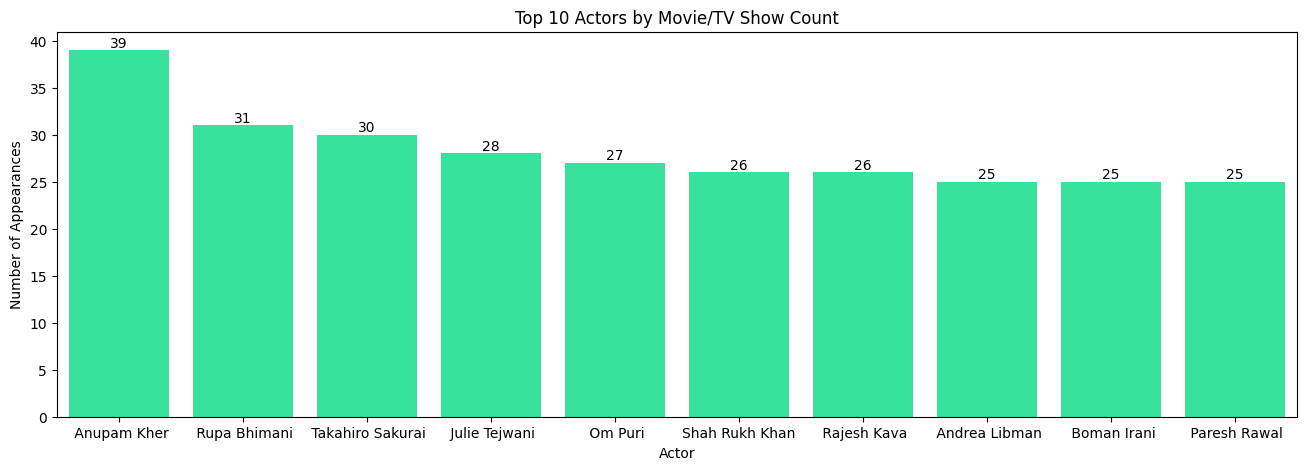

In [ ]:
# Top 10 Actors by Movie/TV Show Count
cast_counts = df_cast['cast'].value_counts()[1:]
top_10_cast = cast_counts.head(10)
plt.figure(figsize=(16, 5))
bar_plot = sns.barplot(x=top_10_cast.index, y=top_10_cast.values, color='#1affa3')
plt.xlabel('Actor')
plt.ylabel('Number of Appearances')
plt.title('Top 10 Actors by Movie/TV Show Count')
for index, value in enumerate(top_10_cast.values):
 bar_plot.text(index, value, str(value), ha='center', va='bottom')
plt.show()

Insights:

- The bar chart shows that **Anupam Kher** has the highest appearances in movies and TV shows.

### Distribution of Ratings

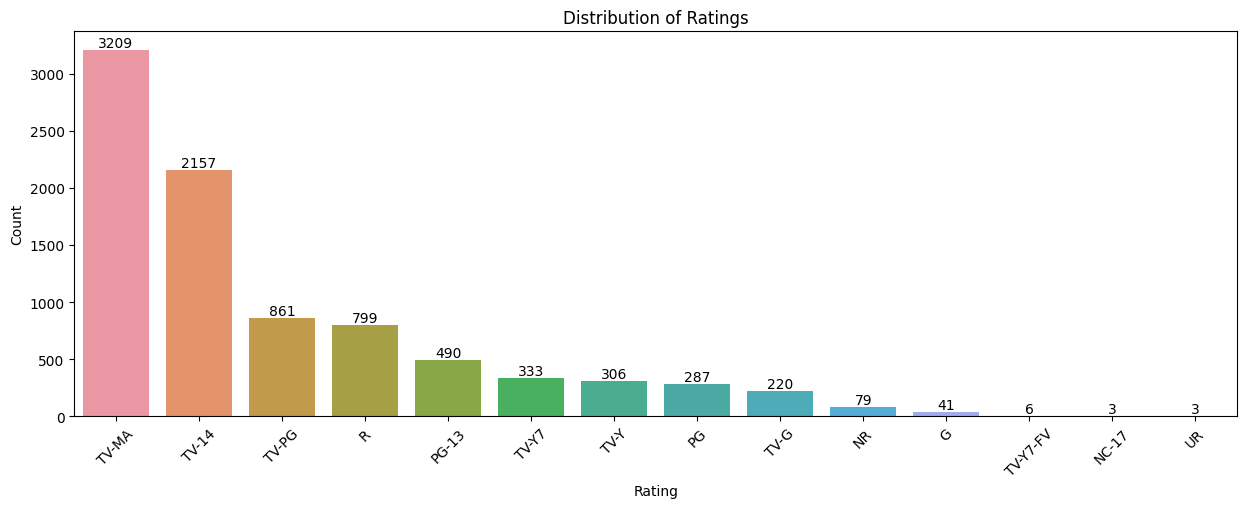

In [ ]:
rating_counts = df['rating'].value_counts()[:-3]
plt.figure(figsize=(15, 5))
bar_plot = sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(rotation=45)
for i, count in enumerate(rating_counts.values):
    bar_plot.text(i, count, count, ha='center', va='bottom')

Insights:

- **"TV-Ma", 'TV-14", "TV-PG", "R" and "PG-13"** are the Top 5 most popular ratings for the content in Netflix.

### Top 10 Genres (Movies & TV shows)

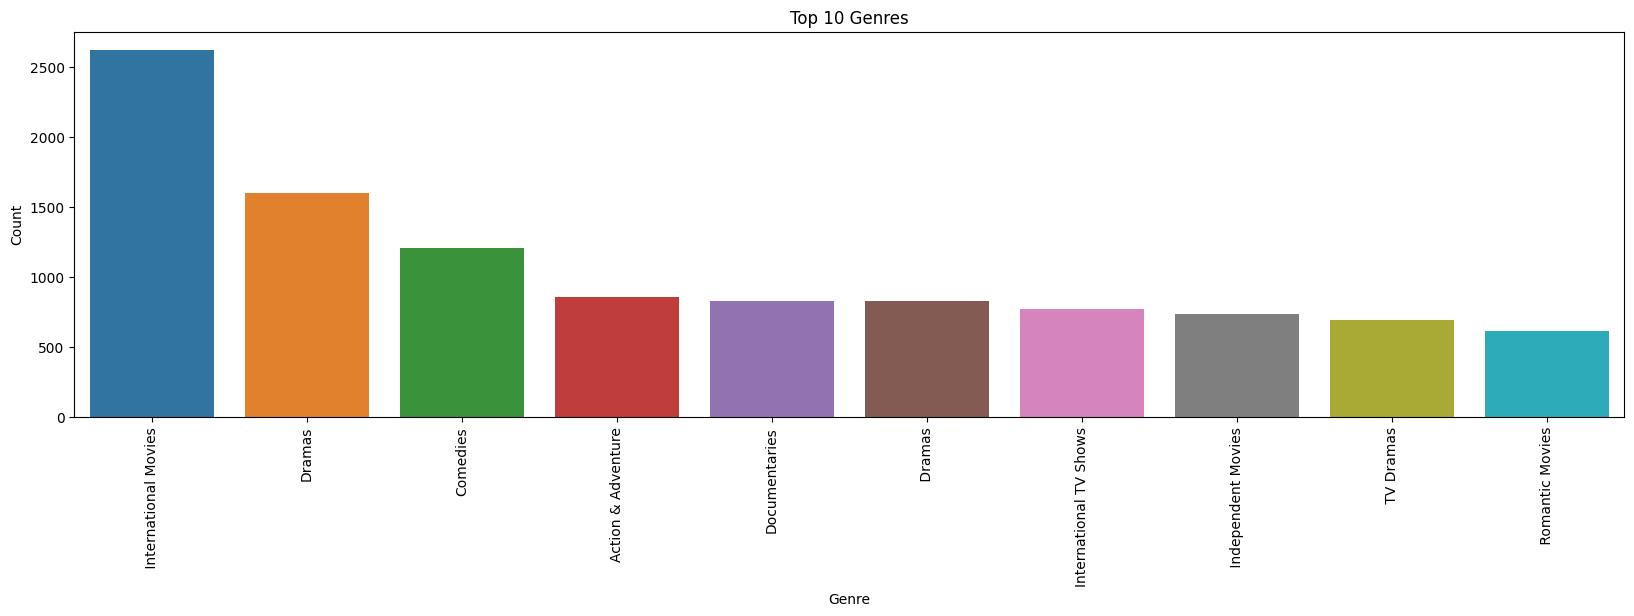

In [ ]:
top_10_genres = df_listed_in['listed_in'].value_counts().head(10)
plt.figure(figsize=(20, 5))
sns.barplot(x=top_10_genres.index, y=top_10_genres.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Top 10 Genres')
plt.show()

Insights:

- The bar chart ranks the top 10 genres of movies and TV shows by their number. “International Movies” leads the list, with “Dramas” coming in second.

### Content Added by Month

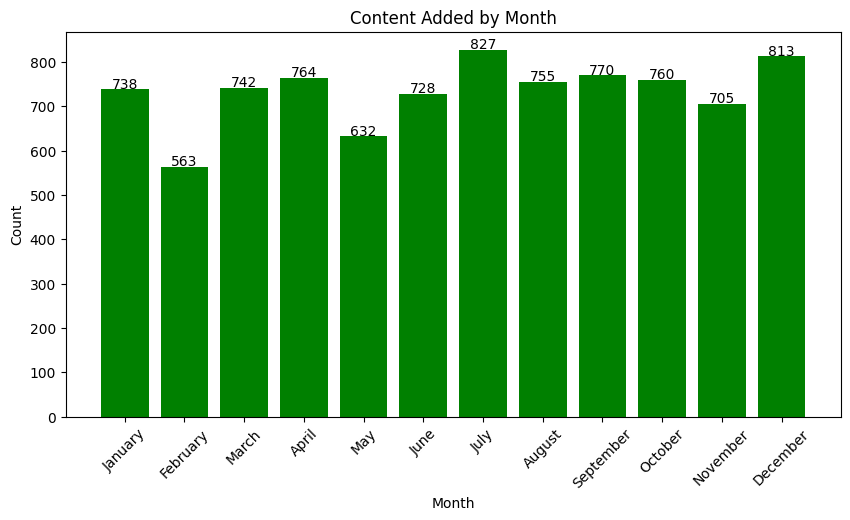

In [ ]:
import calendar

month_data = df['month_name_added'].value_counts()

month_order = list(calendar.month_name)[1:]
month_data = month_data.reindex(month_order)

plt.figure(figsize=(10, 5))
plt.bar(month_data.index, month_data.values, color='green')
plt.xticks(rotation=45)

for i, v in enumerate(month_data.values):
    plt.text(i, v + 3, str(v), ha='center')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Content Added by Month')
plt.show()

Insights:

- This bar chart shows that **July** has the most number of releases followed by December, April, March and January.

- This also indicates that Netflix releases more content Half-Yearly and also during the holiday season (December and Januray), with the least amount of content in the month of February.

### Count of Movies Released by Day of Week

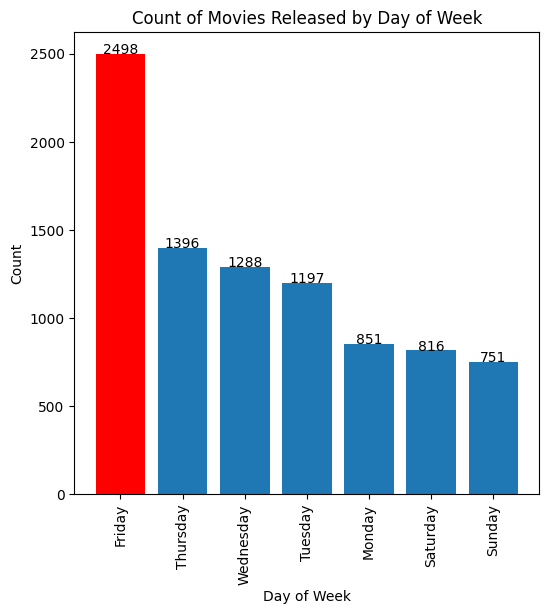

In [ ]:
df['day_name'] = df['date_added'].dt.day_name()

day_counts = df['day_name'].value_counts()

plt.figure(figsize=(6,6))
plt.bar(day_counts.index, day_counts.values)

max_day = day_counts.idxmax()

plt.bar(max_day, day_counts[max_day], color='red')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Count of Movies Released by Day of Week')
plt.xticks(rotation=90)

for i, v in enumerate(day_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center')

plt.show()

Insights:

- It can be observed that most of the content on Netflix is released on "**Friday**", followed by Thursday.

- Generally, Friday is the most popular day for movie and TV show releases. This could be due to the fact that people are more likely to consume content during the weekend.

### Correlation between Genres

Correlation between genres in movies and TV shows can signify the relationship between the popularity or occurrence of different genres. A positive correlation between two genres would indicate that they often appear together, while a negative correlation would indicate that they rarely appear together.

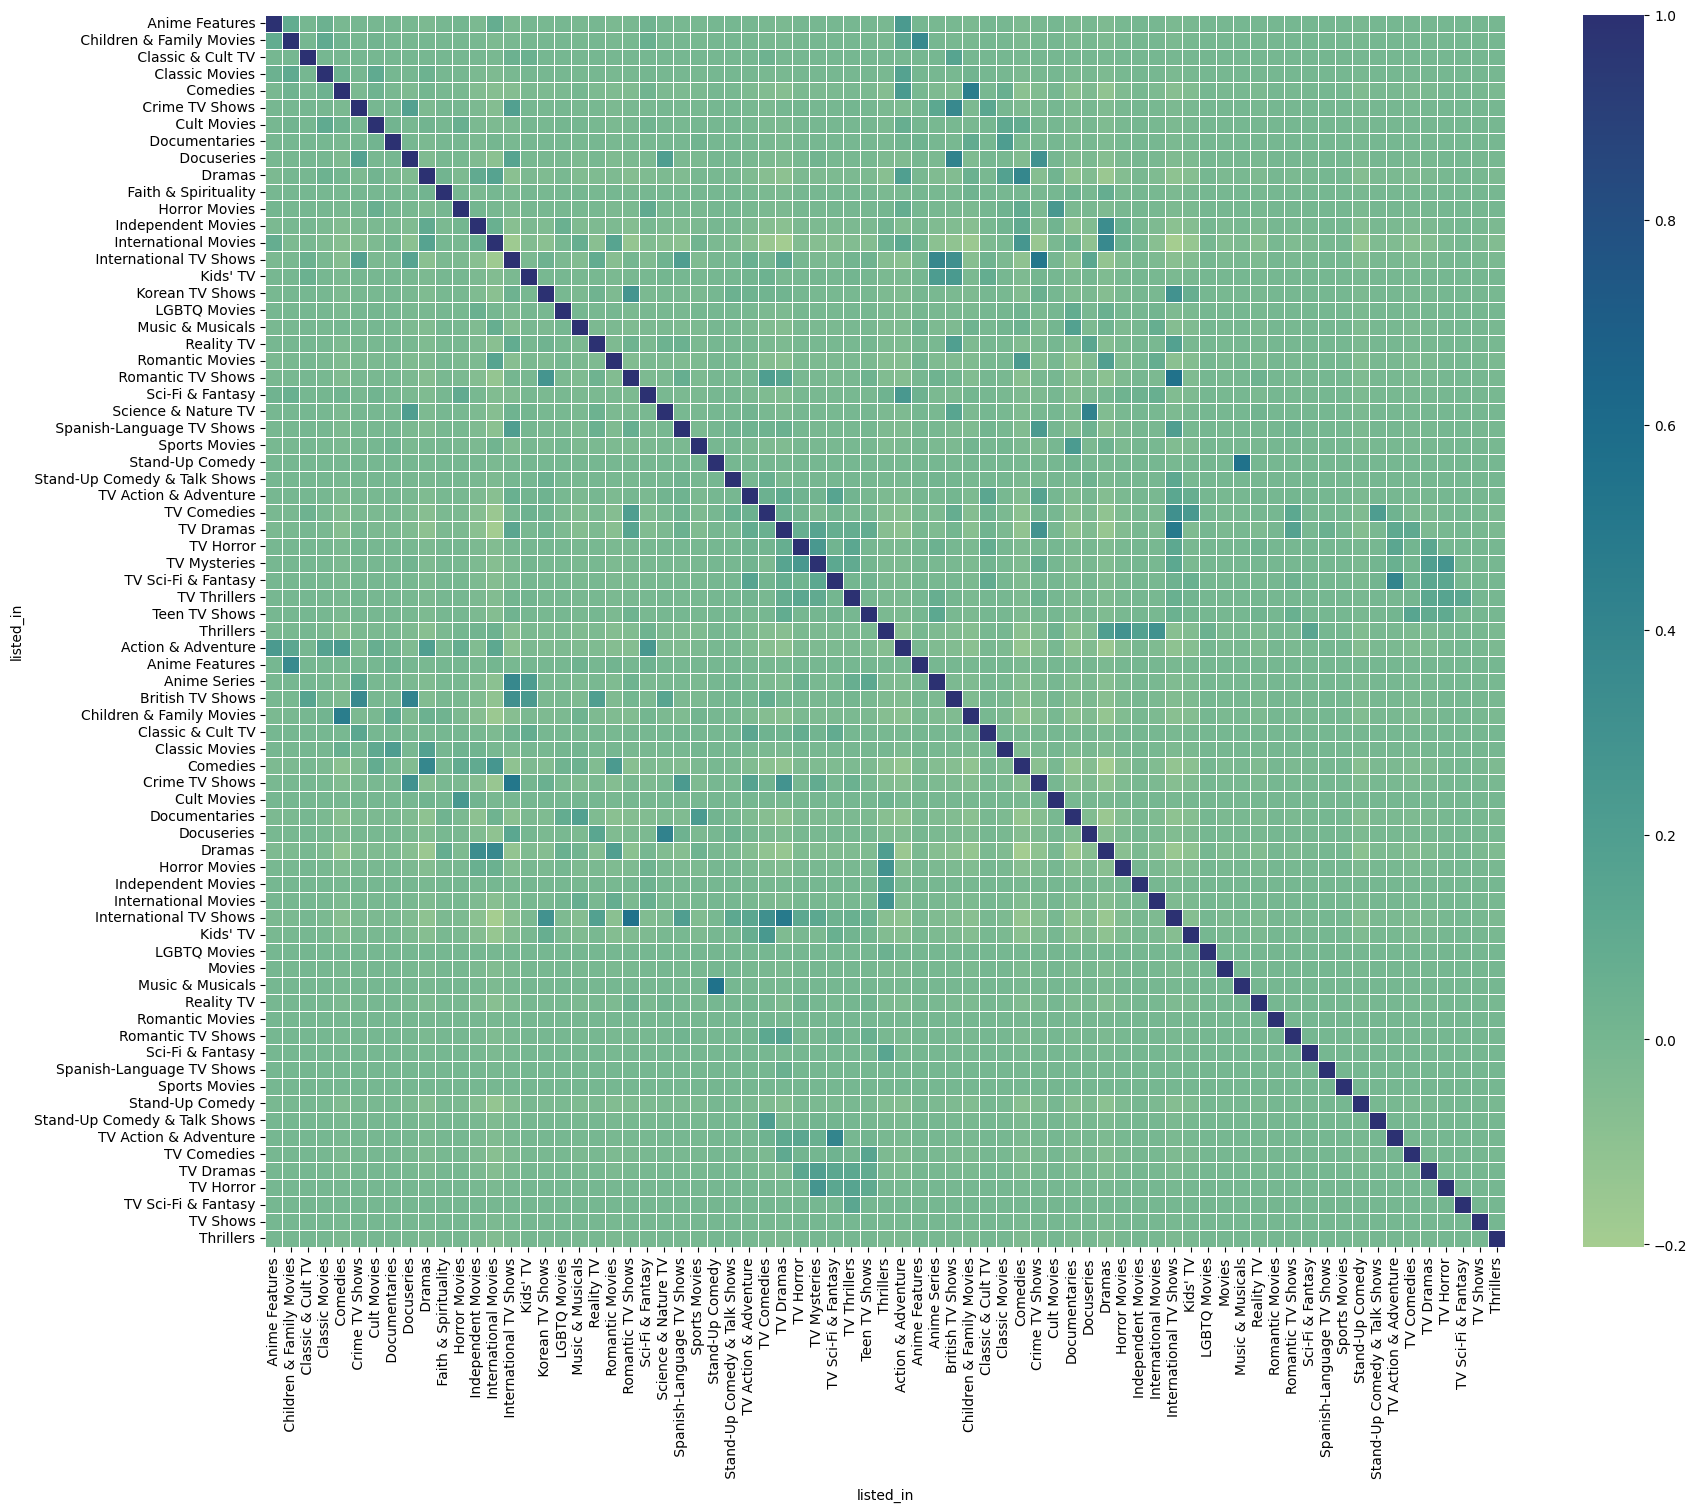

In [ ]:
pivot = pd.pivot_table(df_listed_in, index='show_id', columns='listed_in', aggfunc=lambda x: 1, fill_value=0)

# correlation matrix
corr = pivot.corr()

# Heatmap
plt.figure(figsize=(20,16))

sns.heatmap(corr,cmap='crest',linewidths=.5)


plt.show()

Insights:

- This Heatmap shows the correlation between different genres in Netflix's content. The more tdark the squre tile is the more correlated are the genres and vice-versa.

- The genres "International TV Shows" and "Romantic Tv Shows" are highly correlated.

- Similarly "International TV Shows" are also highly correlated with "TV Dramas" and "Crime TV" Shows as well.

- "Children & Family Movies" are correlated with "Comedies".

- "Music and Musicals" are correlated with "Stand-up-Comedy".

- "British TV Series" are highly correlated with "Docuseries" and "Crime TV Shows".

### Most Common Words in Titles and Description

A **word cloud** is a visual representation of text data, where the size of each word indicates its frequency or importance. A word cloud library is a software library that provides tools for generating word clouds from text data.
Word clouds can be useful for quickly identifying the most prominent terms in a large corpus of text.


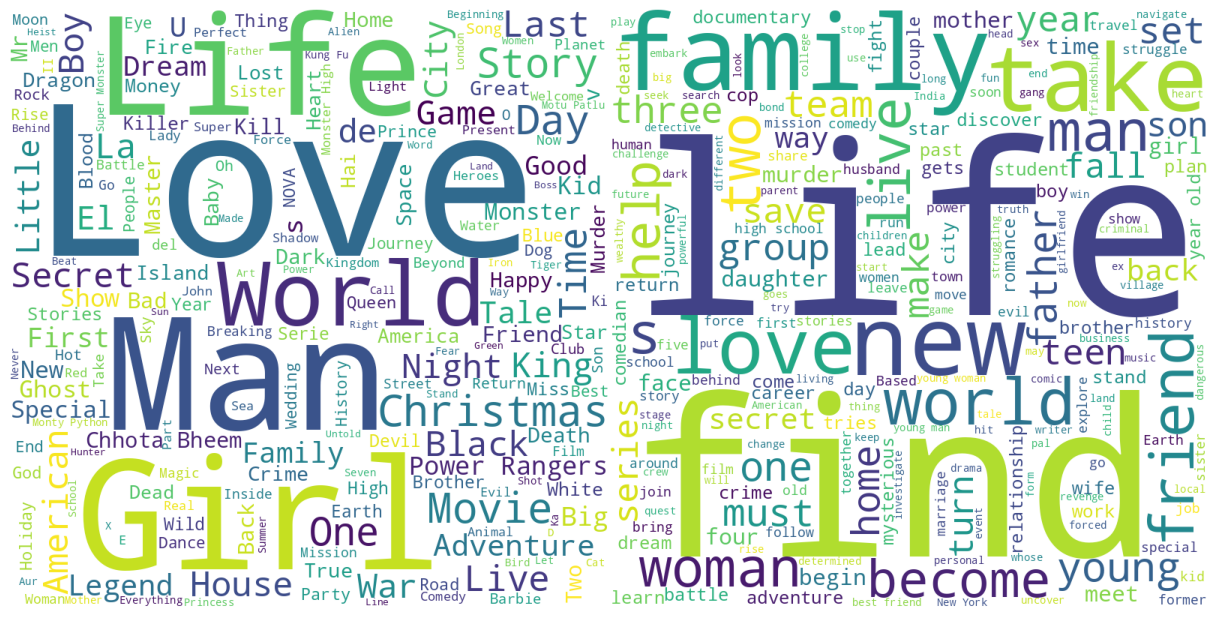

In [ ]:
from wordcloud import WordCloud

title_text = ' '.join(df['title'])
title_wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(title_text)

desc_text = ' '.join(df['description'])
desc_wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(desc_text)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(title_wordcloud)
ax1.axis('off')

ax2.imshow(desc_wordcloud)
ax2.axis('off')

plt.tight_layout(pad=0)
plt.show()

Insights:

The above image shows the wordclouds for both titles and genres of the content in Netflix.

- The words 'Love', 'Family', 'life', 'world', 'find', 'Man' are more prevalent. This could indicate that the content often revolves around themes of love, family, life, and personal discovery, romantic, coming-of-age, and drama genres.

- The word "Christmas" in the word cloud could signify that the content includes movies or TV shows that are related to the festive season, such as holiday-themed comedies, romances, or dramas.

- The words such as "life", "find", and "family", suggesting themes of personal journeys, relationships, and family dynamics prevalent in Netflix's content.


## Conclusions

1.	Netflix has a strong focus on movie production, with a decline in 2020 due to the pandemic impact. It should monitor the recovery and demand for movies in 2021 and beyond.

2.	Netflix has a large presence in the US, India, and the UK markets, with potential opportunities for growth in Canada and France.

3.	Netflix offers a variety of content durations, with movies averaging 100 minutes and majority of the TV shows ranging from 1 - 4 seasons.

4.	Netflix has some prominent directors and actors who have contributed to its content library. Rajiv Chilaka and Anupam Kher are the director and actor with the most titles on Netflix, respectively.

5.	Netflix has a diverse range of ratings for its content, with TV-MA, TV-14, TV-PG, R, and PG-13, with TV-MA, being the most common.

6.	Netflix has a high demand for International Movies and Dramas, as well as other genres such as Crime TV Shows, Romantic TV Shows, and British TV Shows.

7. The most popular genres for Netflix content are International movies, Dramas, Comedies, Action & Adventure and documentaries.

8.	Netflix has a strategic approach to content release, with July and December being the peak months. Netflix releases most of the content in July and December, coinciding with half-yearly and holiday seasons.

9. Most of the content on Netflix is released on “Friday”.

10. Netflix has some recurring themes and topics in its titles and descriptions, such as love, family, life, personal discovery, adventure, and Christmas.The word Christmas also appears often in titles and descriptions, indicating " Holiday - Themed " content.


## Recommendations

- Netflix should continue to produce more movies than TV shows, as they have a larger market share and appeal to a wider audience.

- Netflix should also diversify its content production across different countries and regions, as international movies and TV shows are popular among its subscribers. Netflix has a large presence in the US, India, and the UK markets, with potential opportunities for growth in Canada and France. It should tailor its content strategy to suit the preferences and trends of these markets. It should also focus on the European Markets as they are prevalent in the top 10 countires.

- Netflix should optimize its content duration and format to suit the preferences of its viewers, who tend to favor shorter and more concise series and movies.

- Netflix should leverage its data on ratings, genres, and correlations to create more personalized and relevant recommendations for its users, and to identify potential gaps and opportunities in its content portfolio.

- Netflix should also capitalize on its seasonal and holiday-themed content, as they generate high viewership and engagement among its customers.

- Netflix should collaborate with more directors and actors who have a proven track record of creating successful and popular titles on its platform, such as Rajiv Chilaka and Anupam Kher.

- Netflix should also explore new and emerging genres and topics that can attract and retain its customers, such as music and musicals, stand-up comedy, and docuseries.

- Netflix should use natural language processing and sentiment analysis to understand the emotions and opinions of its customers, and to generate more appealing and catchy titles and descriptions for its content.

- Netflix should also invest in more original and exclusive content that can differentiate it from its competitors and create a loyal fan base among its customers.

- Netflix should also partner with more content creators, distributors, and platforms that can expand its reach and exposure to new markets and audiences.